# Import software libraries

In [18]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive


In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA



# Load and preview the data

In [20]:
df = pd.read_pickle("users_data_final.pickle")

# Check the shape of the data

In [21]:
df.shape

(45179, 33)

# Check the data types

In [22]:
df.dtypes

user_id                 object
number_transactions    float64
total_amount_usd       float64
job_management           int64
job_technician           int64
job_entrepreneur         int64
job_blue-collar          int64
job_retired              int64
job_admin.               int64
job_services             int64
job_self-employed        int64
job_unemployed           int64
job_housemaid            int64
job_student              int64
education_tertiary       int64
education_secondary      int64
education_Unknown        int64
education_primary        int64
default                   bool
housing                   bool
loan                      bool
contact_cellular         int64
contact_telephone        int64
duration                 int64
campaign                 int64
pdays                    int64
previous                 int64
term_deposit              bool
device_desktop           int64
device_tablet            int64
single                   uint8
age_group_encoded         int8
month_jo

# Explore the distribution of the target variable

- You need to plot the distribution of the target column (term_deposit) and explain what is the problem of the distribution.

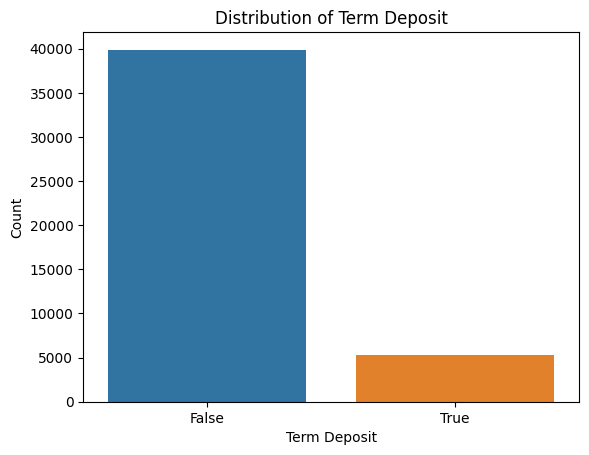

In [23]:
sns.countplot(df,x='term_deposit')
plt.xlabel('Term Deposit')
plt.ylabel('Count')
plt.title('Distribution of Term Deposit')
plt.show()

Based on the distribution of the target variable, it appears that there is an imbalance issue.There are more false values than true values

# Apply oversampling or SMOTE to the target label

In [24]:
df.drop('user_id', axis=1, inplace=True)
X = df.drop('term_deposit',axis=1)
y = df['term_deposit']

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

df_resampled = pd.concat([pd.DataFrame(X_resampled), pd.Series(y_resampled, name='term_deposit')], axis=1)
df_resampled


,number_transactions,total_amount_usd,job_management,job_technician,job_entrepreneur,job_blue-collar,job_retired,job_admin.,job_services,job_self-employed,...,duration,campaign,pdays,previous,device_desktop,device_tablet,single,age_group_encoded,month_joined,term_deposit
0,3.000000,2143.000000,1,0,0,0,0,0,0,0,...,261,1,-1,0,0,0,0,4,8,False
1,0.000000,1369.420000,0,1,0,0,0,0,0,0,...,151,1,-1,0,1,0,1,2,7,False
2,2.000000,2.000000,0,0,1,0,0,0,0,0,...,76,1,-1,0,0,0,0,1,6,False
3,0.000000,1369.420000,0,0,0,1,0,0,0,0,...,92,1,-1,0,0,1,0,3,6,False
4,1.000000,1.000000,0,0,0,0,0,0,0,0,...,198,1,-1,0,0,0,1,1,8,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79783,2.460709,79.544685,0,0,0,0,0,0,0,0,...,1097,1,-1,0,0,0,0,2,8,True
79784,4.349301,329.904191,0,0,0,0,0,0,0,0,...,330,1,-1,0,0,0,1,0,7,True
79785,3.351386,178.676333,0,0,0,0,0,0,0,0,...,1166,1,-1,0,0,0,0,1,2,True
79786,2.339141,418.171894,0,0,0,0,0,0,0,0,...,452,2,184,2,1,0,0,2,2,True


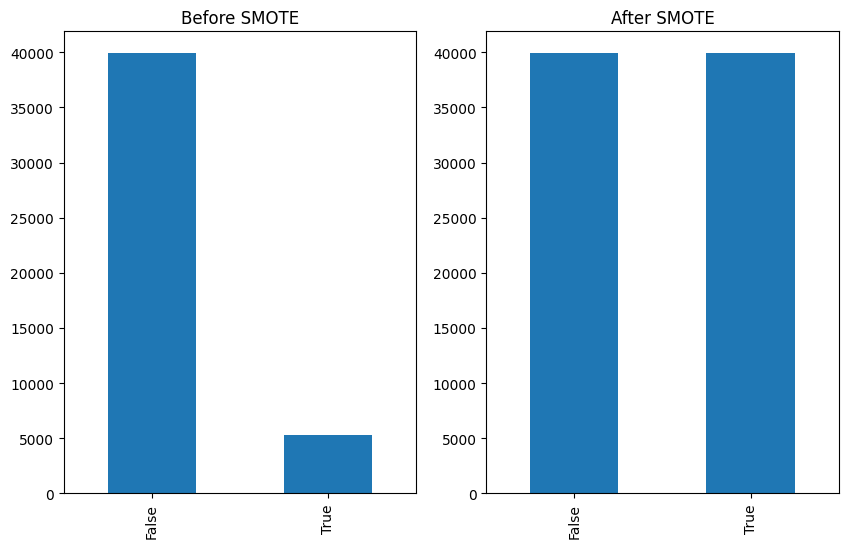

In [25]:
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.title('Before SMOTE')
df['term_deposit'].value_counts().plot(kind='bar')
plt.subplot(1, 2, 2)
plt.title('After SMOTE')
df_resampled['term_deposit'].value_counts().plot(kind='bar')
plt.show()

# Normalize the data

In [26]:
scaler = MinMaxScaler()
X_resampled_normalized = scaler.fit_transform(X_resampled)


# Standardlize the data

In [27]:
scaler = StandardScaler()
X_resampled_standardized = scaler.fit_transform(X_resampled)

# Plot the PCA

In [36]:
pca = PCA()
X_pca = pca.fit_transform(X_resampled_standardized)


<ipython-input-37-011ea9c19412>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


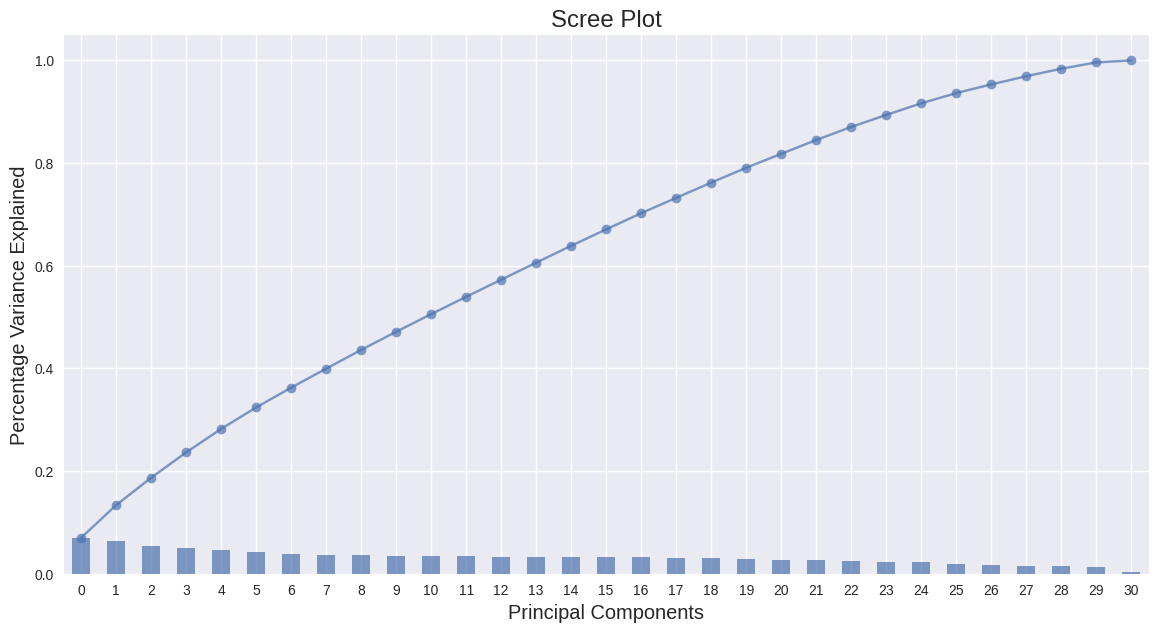

In [37]:

plt.style.use("seaborn")
plt.figure(figsize=(14,7))
exp_var = pd.Series(pca.explained_variance_ratio_)
exp_var.plot(kind="bar", alpha=0.7)

total = 0
var_ls = []
for x in exp_var:
    total = total + x
    var_ls.append(total)

pd.Series(var_ls).plot(marker="o", alpha=0.7)
plt.xlabel("Principal Components", fontsize="x-large")
plt.ylabel("Percentage Variance Explained", fontsize="x-large")
plt.title("Scree Plot", fontsize="xx-large")
plt.show()


In [38]:
X_pca = pca.fit_transform(X_resampled_normalized)

<ipython-input-39-82c8f016a184>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


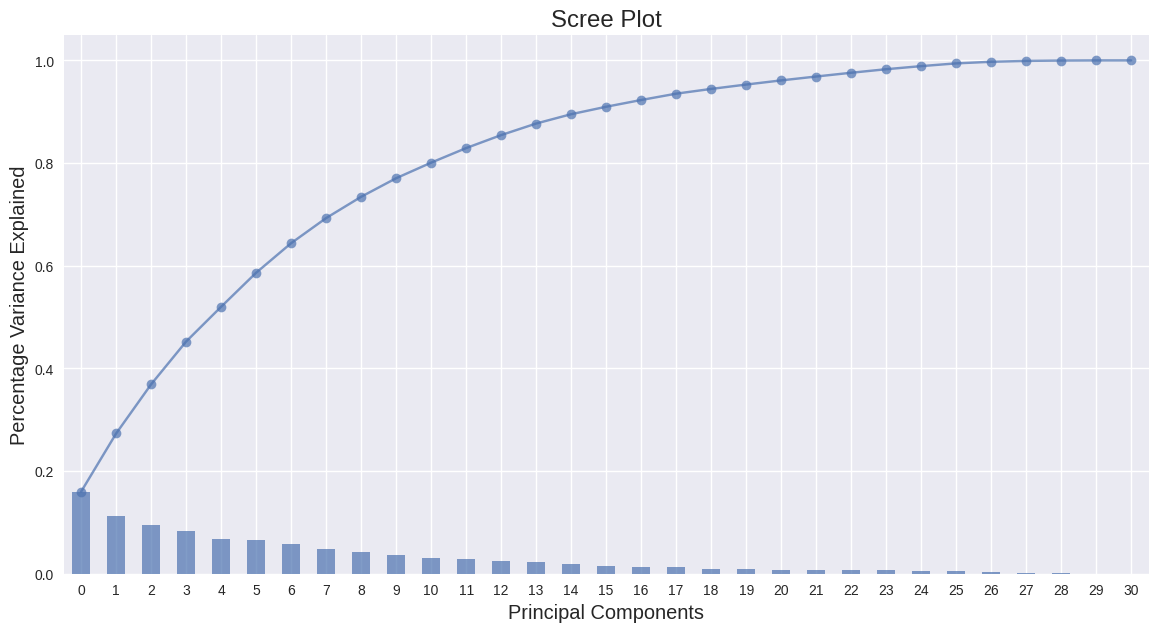

In [39]:

plt.style.use("seaborn")
plt.figure(figsize=(14,7))
exp_var = pd.Series(pca.explained_variance_ratio_)
exp_var.plot(kind="bar", alpha=0.7)

total = 0
var_ls = []
for x in exp_var:
    total = total + x
    var_ls.append(total)

pd.Series(var_ls).plot(marker="o", alpha=0.7)
plt.xlabel("Principal Components", fontsize="x-large")
plt.ylabel("Percentage Variance Explained", fontsize="x-large")
plt.title("Scree Plot", fontsize="xx-large")
plt.show()


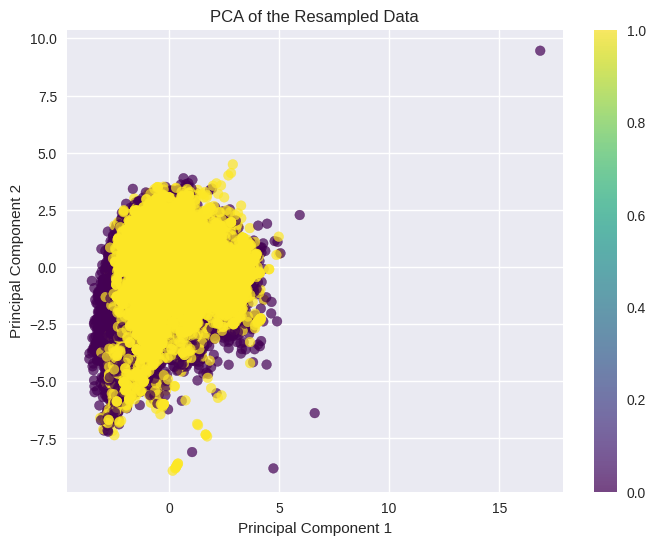

In [35]:
# Plot the PCA
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_resampled, cmap='viridis', alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of the Resampled Data')
plt.colorbar()
plt.show()